In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [232]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [233]:
dataimport = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Indexes/DOW JONES.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.copy()

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,UNH UN Equity,GS UN Equity,MSFT UQ Equity,HD UN Equity,CAT UN Equity,AMGN UQ Equity,MCD UN Equity,CRM UN Equity,BA UN Equity,...,JPM UN Equity,IBM UN Equity,MRK UN Equity,NKE UN Equity,MMM UN Equity,DIS UN Equity,KO UN Equity,CSCO UQ Equity,INTC UQ Equity,VZ UN Equity
0,2011-01-03,37.13,173.05,27.98,35.31,94.15,55.55,76.60,34.1500,66.40,...,43.58,140.8676,34.3651,21.5225,86.79,37.82,32.610,20.49,20.85,36.43
1,2011-01-04,37.47,173.08,28.04,34.67,93.71,56.75,74.31,33.9225,66.94,...,44.16,141.0204,34.6607,20.9925,86.67,38.99,31.935,20.53,21.14,37.16
2,2011-01-05,37.59,174.00,28.00,34.56,94.52,56.73,74.66,35.5500,67.48,...,44.70,140.4569,34.8609,21.1300,86.67,39.96,31.745,20.77,20.94,37.67
3,2011-01-06,38.37,172.21,28.80,34.42,93.54,56.55,74.21,35.8350,68.80,...,44.48,141.9947,35.3377,20.9400,86.14,39.65,31.515,20.95,20.77,36.23
4,2011-01-07,38.45,170.69,28.58,34.38,93.73,56.95,74.37,35.5550,69.38,...,43.64,141.2974,35.6142,20.8825,86.23,39.45,31.460,20.97,20.66,35.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,2022-12-26,531.31,345.51,238.73,318.73,239.87,263.92,267.57,129.4400,189.06,...,131.28,141.6500,111.8600,116.2500,120.14,88.01,63.820,47.48,26.09,38.41
3126,2022-12-27,531.99,341.97,236.96,319.55,243.14,263.39,266.84,130.6600,189.40,...,131.74,142.4200,112.1200,117.5600,120.22,86.37,64.210,47.53,25.94,39.25
3127,2022-12-28,528.45,340.87,234.53,315.73,239.38,261.42,265.11,128.4700,188.38,...,132.46,140.0200,111.0800,114.9800,118.29,84.17,63.570,47.07,25.54,38.81
3128,2022-12-29,529.88,343.43,241.01,320.41,240.20,263.16,265.93,132.5400,188.91,...,133.22,141.0600,110.8200,117.3500,120.57,87.18,63.950,47.50,26.21,39.26


In [234]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [235]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,UNH UN Equity,GS UN Equity,MSFT UQ Equity,HD UN Equity,CAT UN Equity,AMGN UQ Equity,MCD UN Equity,CRM UN Equity,BA UN Equity,...,JPM UN Equity,IBM UN Equity,MRK UN Equity,NKE UN Equity,MMM UN Equity,DIS UN Equity,KO UN Equity,CSCO UQ Equity,INTC UQ Equity,VZ UN Equity
0,2011-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3112,2022-12-27,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3113,2022-12-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
3114,2022-12-29,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [236]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [237]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,UNH UN Equity,GS UN Equity,MSFT UQ Equity,HD UN Equity,CAT UN Equity,AMGN UQ Equity,MCD UN Equity,CRM UN Equity,BA UN Equity,...,JPM UN Equity,IBM UN Equity,MRK UN Equity,NKE UN Equity,MMM UN Equity,DIS UN Equity,KO UN Equity,CSCO UQ Equity,INTC UQ Equity,VZ UN Equity
0,2011-01-21,78.839006,30.986209,45.380337,72.368001,40.021152,59.191100,48.523029,33.203258,74.016696,...,62.632475,84.347433,24.962914,28.887308,76.986292,71.005179,28.397677,47.849470,43.894076,37.414520
1,2011-01-24,64.942977,31.478731,53.656533,73.870359,52.697477,62.732913,52.300088,27.357908,77.984282,...,59.090033,89.502247,24.195985,33.547598,82.384580,73.433026,39.799504,63.973714,60.265308,42.499210
2,2011-01-25,72.093966,23.632407,55.081762,78.463964,51.537356,60.438037,53.297477,23.464157,72.426269,...,57.155942,90.914481,21.119401,36.295134,56.959819,70.876514,36.132342,71.996870,67.940863,50.682715
3,2011-01-26,65.519465,22.674345,60.664967,80.359614,58.899604,50.111566,49.819757,34.670761,53.739073,...,58.235524,88.093840,20.118173,48.067237,63.994940,59.219995,36.132342,65.231578,71.465386,57.848030
4,2011-01-27,77.631442,34.206423,62.020661,83.689688,62.833996,50.111566,42.010911,34.607599,56.667834,...,59.436338,88.123645,21.371184,39.446218,60.229699,59.561055,32.973273,66.705609,71.465386,58.799159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,49.786586,37.038515,43.804779,50.644444,61.113511,32.768121,45.578633,37.540462,60.385508,...,49.229222,44.901630,67.197873,63.478099,38.910855,38.638623,59.649645,48.398021,33.923066,56.428094
3112,2022-12-27,50.306198,34.423628,42.109058,51.426252,64.485854,32.097384,44.181029,39.909614,60.720595,...,50.711842,47.132697,68.012144,65.097848,39.201624,35.531134,62.450510,48.852533,32.978941,63.396704
3113,2022-12-28,47.547732,33.629137,39.829476,47.640320,58.232367,29.666614,40.974437,37.183094,59.105358,...,53.024170,41.493020,61.441976,59.500902,34.887383,31.832646,55.626683,44.931478,30.538150,58.150434
3114,2022-12-29,48.769784,37.258412,47.925281,52.275791,59.162464,34.392623,43.083074,44.738973,59.705163,...,55.402559,44.587222,59.884473,62.675521,42.884227,40.897295,58.524506,49.048368,38.719345,61.646160


In [238]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,UNH UN Equity,GS UN Equity,MSFT UQ Equity,HD UN Equity,CAT UN Equity,AMGN UQ Equity,MCD UN Equity,CRM UN Equity,BA UN Equity,...,JPM UN Equity,IBM UN Equity,MRK UN Equity,NKE UN Equity,MMM UN Equity,DIS UN Equity,KO UN Equity,CSCO UQ Equity,INTC UQ Equity,VZ UN Equity
0,2011-01-21,40.41,166.20,28.02,36.51,92.75,56.97,75.01,33.0600,71.68,...,45.29,148.5280,32.3245,20.5750,89.29,39.74,31.380,20.74,20.82,34.95
1,2011-01-24,39.81,166.30,28.38,36.65,94.57,57.29,75.38,31.9575,72.73,...,45.02,152.4728,32.2292,20.6650,90.32,39.94,31.625,21.17,21.24,35.24
2,2011-01-25,40.62,161.98,28.45,37.16,94.39,57.16,75.48,30.9925,72.24,...,44.87,154.2017,31.8096,20.7200,88.50,39.86,31.480,21.54,21.56,35.79
3,2011-01-26,40.25,161.30,28.75,37.42,95.75,56.48,75.17,32.0725,70.02,...,44.98,153.8196,31.6571,21.0000,89.57,39.44,31.480,21.38,21.75,36.40
4,2011-01-27,42.29,164.03,28.83,37.98,96.63,56.48,74.35,32.0600,70.56,...,45.10,153.8483,31.7047,20.6925,89.19,39.46,31.350,21.45,21.75,36.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,531.31,345.51,238.73,318.73,239.87,263.92,267.57,129.4400,189.06,...,131.28,141.6500,111.8600,116.2500,120.14,88.01,63.820,47.48,26.09,38.41
3112,2022-12-27,531.99,341.97,236.96,319.55,243.14,263.39,266.84,130.6600,189.40,...,131.74,142.4200,112.1200,117.5600,120.22,86.37,64.210,47.53,25.94,39.25
3113,2022-12-28,528.45,340.87,234.53,315.73,239.38,261.42,265.11,128.4700,188.38,...,132.46,140.0200,111.0800,114.9800,118.29,84.17,63.570,47.07,25.54,38.81
3114,2022-12-29,529.88,343.43,241.01,320.41,240.20,263.16,265.93,132.5400,188.91,...,133.22,141.0600,110.8200,117.3500,120.57,87.18,63.950,47.50,26.21,39.26


In [239]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

    

In [240]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

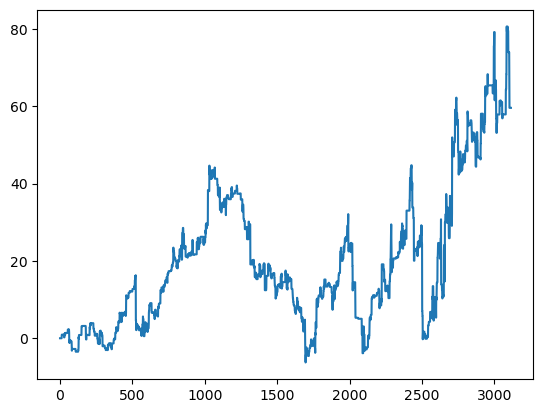

In [241]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/daily/DOW JONES_macd_rsi.png', dpi=300)
plt.show()

In [242]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [243]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

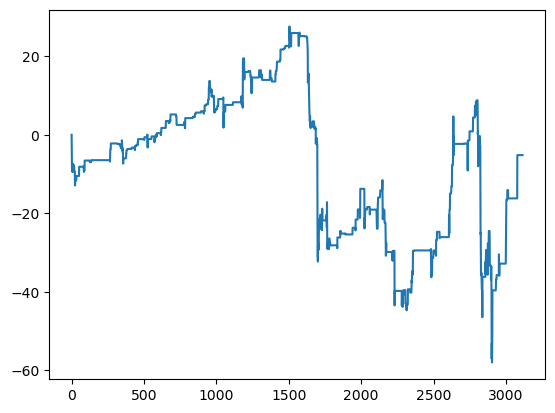

In [244]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/daily/DOW JONES_rsi.png', dpi=300)
plt.show()